In [1]:
#               __  ___  _      __                ___              _     ___                    _      ___     _            _   _             
#              /__\/   \/_\    / _| ___  _ __    / __\__ _ _ __ __| |   / __\ __ __ _ _   _  __| |    /   \___| |_ ___  ___| |_(_) ___  _ __  
#             /_\ / /\ //_\\  | |_ / _ \| '__|  / /  / _` | '__/ _` |  / _\| '__/ _` | | | |/ _` |   / /\ / _ \ __/ _ \/ __| __| |/ _ \| '_ \ 
#            //__/ /_//  _  \ |  _| (_) | |    / /__| (_| | | | (_| | / /  | | | (_| | |_| | (_| |  / /_//  __/ ||  __/ (__| |_| | (_) | | | |
#            \__/___,'\_/ \_/ |_|  \___/|_|    \____/\__,_|_|  \__,_| \/   |_|  \__,_|\__,_|\__,_| /___,' \___|\__\___|\___|\__|_|\___/|_| |_|

Credit Card Fraud Detection is a classic class-imbalance problem where the number of fraud transactions is much lesser than the number of legitimate transaction for any bank. Most of the approaches involve building model on such imbalanced data, and thus fails to produce results on real-time new data because of overfitting on training data and a bias towards the majoritarian class of legitimate transactions. Thus, we can see this as an anomaly detection problem.

1. What time does the Credit Card Frauds usually take place?
2. What are the general trends of amounts for Credit Card Fraud Transactions?
3. How do we balance the data to not let the model overfit on legitimate transactions?

In [2]:
# Libraries are imported.
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Reading the dataset.
raw_df = pd.read_csv('/Volumes/ALEJANDRO/S.E./Credit-Card-Fraud-Detection/Datasets/master.csv')

In [4]:
# The Dataset is printed.
print(raw_df)

         Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
...             ...                   ...                  ...   
1852389     1296670   2020-06-21 12:12:08       30263540414123   
1852390     1296671   2020-06-21 12:12:19     6011149206456997   
1852391     1296672   2020-06-21 12:12:32     3514865930894695   
1852392     1296673   2020-06-21 12:13:36     2720012583106919   
1852393     1296674   2020-06-21 12:13:37  4292902571056973207   

                                     merchant        category     amt  \
0                       fraud_Kirlin and Sons   personal_care    2.86   
1                        fraud_Sporer-Keebler   personal_care

In [5]:
# Count the values.
raw_df['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [ ]:
# -------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------> Data unbalanced check <-------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
# Labeling the data in genuine and fraudulent transactions, this way it is easier to observe that the data is unbalanced.
labels=["Genuine", "Fraud"]
fraud_or_not = raw_df['is_fraud'].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
# Plotting the values.
fig = px.pie(values = raw_df['is_fraud'].value_counts(), names = labels , width = 700, height = 400, color_discrete_sequence = ["skyblue", "black"]
             ,title = "Fraud vs Genuine transactions")
fig.show()

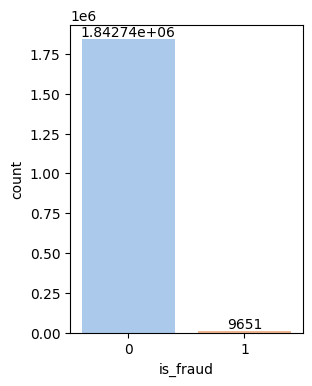

In [7]:
# Unbalance data represented with bars.
plt.figure(figsize = (3,4))
ax = sns.countplot(x = 'is_fraud', data = raw_df, palette = "pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [8]:
# Percentage of data.
print('Genuine transactions:', round(raw_df['is_fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Fraudulent transactions:', round(raw_df['is_fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Genuine transactions: 99.48 % of the dataset
Fraudulent transactions: 0.52 % of the dataset


In [10]:
# -------------------------------------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------> Data pre-processing <-------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------------------------------------

SyntaxError: invalid syntax (4043218738.py, line 2)

In [9]:
# First it is necessary to drop all the duplicate values.
df = raw_df.copy()
df.drop_duplicates(inplace = True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully
